앞서 본 SFTF의 변형을 다룬다

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

# 주파수 그리드 밀도 (Frequency Grid Density)

- 이산 STFT를 계산할 때 해상도(resolution)가 신호의 샘플링 속도와 STFT 윈도우 크기에 따라 달라지는 주파수 그리드(frequency grid)가 있다. 
- 이 노트북에서는 STFT 계산에서 윈도우가 있는 섹션을 적절하게 패딩(padding)하여 주파수 그리드를 더 조밀하게 만드는 방법에 대해 설명한다. 
- 종종 이 절차가 주파수 해상도를 증가시킨다고 말한다. 하지만 이것은 아래에서 설명하는 것처럼 질적인 의미에서 사실이 아니다.

- 주파수 해상도란 원하는 신호를 주파수 domain에서 관찰할 때 얼마나 촘촘한 간격으로 해당 주파수 대역의 값을 관찰 할 수 있는가를 말한다고 할 수 있다.

## DFT 주파수 그리드

- $x\in \mathbb{R}^N$ 를 길이 $N\in\mathbb{N}$의 샘플 $x(0), x(1), \ldots, x(N-1)$의 이산 신호라고 하자.
- 샘플링 레이트 $F_\mathrm{s}$가 주어졌을 때, $x$는 연속 시간 신호 $f:\mathbb{R}\to\mathbb{R}$를 샘플링하여 얻는다고 가정한다.
- 그러면 **이산 푸리에 변환**(DFT) $X := \mathrm{DFT}_N \cdot x$은 특정 주파수에 대한 연속 푸리에 변환 $\hat{f}$의 근사치로 해석될 수 있다.
$$ 
X(k) := \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N) 
\approx {F_\mathrm{s}} \cdot \hat{f} \left(k \cdot \frac{F_\mathrm{s}}{N}\right)
$$
for $k\in[0:N-1]$. 

- 따라서 $X(k)$의 인덱스 $k$는 다음의 물리적 주파수(헤르츠단위)에 해당된다.
\begin{equation}
         F_\mathrm{coef}^N(k) := \frac{k\cdot F_\mathrm{s}}{N} 
\end{equation}

- 즉, 이산 푸리에 변환은 $\mathrm{DFT}_N$의 크기 $N$에 따라 달라지는, 해상도 $F_\mathrm{s}/N$의 선형 **주파수 그리드**(frequency grid)를 소개한다. 

- 주파수 그리드의 밀도를 높이기 위한 한 가지 아이디어는 인위적으로 신호에 0을 추가하여 DFT의 크기를 늘리는 것이다. 

- 이를 위해 $L\in\mathbb{N}$ with $L\geq N$라고 하자. 그런 다음 $\tilde{x}\in \mathbb{R}^L$ 신호를 얻기 위해 $x$ 신호 오른쪽에 **제로 패딩**(zero padding)을 적용한다.
\begin{equation}
\tilde{x}(n) :=\left\{\begin{array}{ll}
    x(n) ,& \,\,\mbox{for}\,\, n \in[0:N-1],\\
    0,    & \,\,\mbox{for}\,\, n \in[N:L-1].
\end{array}\right.    
\end{equation}

- $\mathrm{DFT}_L$을 적용하면 다음을 얻는다.
$$ 
\tilde{X}(k) = \mathrm{DFT}_L \cdot \tilde{x}
= \sum_{n=0}^{L-1} \tilde{x}(n) \exp(-2 \pi i k n / L)
= \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / L)
\approx {F_\mathrm{s}} \cdot \hat{f} \left(k \cdot \frac{F_\mathrm{s}}{L}\right)
$$
for $k\in[0:L-1]$. 

- 이제 계수 $\tilde{X}(k)$는 다음의 물리적 주파수에 대응된다.
\begin{equation}
         F_\mathrm{coef}^L(k) := \frac{k\cdot F_\mathrm{s}}{L},
\end{equation}
- 이는 선형 주파수 해상도 $F_\mathrm{s}/L$를 보인다.

- 예를 들어, $L=2N$인 경우 주파수 그리드 해상도는 2배 증가한다. 즉, DFT가 길수록 간격이 더 가까운 주파수 빈(bin)이 더 많아진다. 
- 그러나 이 트릭은 DFT의 근사 품질을 개선하지 않는다는 점에 유의해야 한다(리만(Riemann) 근사의 합계 수는 여전히 $N$임에 유의하자). 
- 단, $L\geq N$ 및 제로 패딩을 사용할 때 주파수 축의 선형 샘플링이 정제(refine)된다. 

- 다음 예는 $\mathrm{DFT}_N \cdot x$를 $\mathrm{DFT}_L \cdot \tilde{x}$와 비교한다.

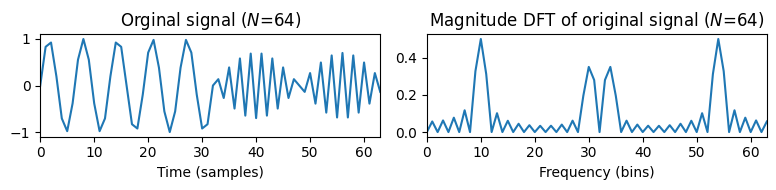

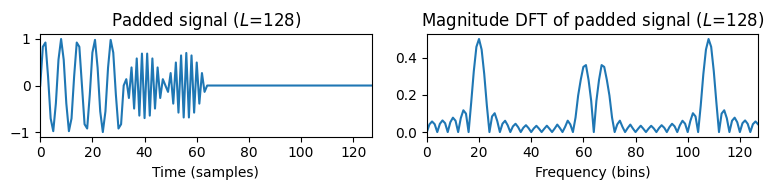

In [11]:
Fs = 32
duration = 2
freq1 = 5
freq2 = 15
N = int(duration * Fs)
t = np.arange(N) / Fs
t1 = t[:N//2]
t2 = t[N//2:]

x1 = 1.0 * np.sin(2 * np.pi * freq1 * t1)
x2 = 0.7 * np.sin(2 * np.pi * freq2 * t2)
x = np.concatenate((x1, x2))

plt.figure(figsize=(8, 2))

ax1 = plt.subplot(1, 2, 1)
plt.plot(x)
plt.title('Orginal signal ($N$=%d)' % N)
plt.xlabel('Time (samples)')
plt.xlim([0, N - 1])
plt.subplot(1, 2, 2)
Y = np.abs(np.fft.fft(x)) / Fs
plt.plot(Y)
plt.title('Magnitude DFT of original signal ($N$=%d)' % N)
plt.xlabel('Frequency (bins)')
plt.xlim([0, N - 1])
plt.tight_layout()

L = 2 * N
pad_len = L - N
t_tilde = np.concatenate((t, np.arange(len(x), len(x) + pad_len) / Fs))
x_tilde = np.concatenate((x, np.zeros(pad_len)))
                         
plt.figure(figsize=(8, 2))
ax1 = plt.subplot(1, 2, 1)
plt.plot(x_tilde)
plt.title('Padded signal ($L$=%d)' % L)
plt.xlabel('Time (samples)')
plt.xlim([0, L - 1])
plt.subplot(1, 2, 2)
Y_tilde = np.abs(np.fft.fft(x_tilde)) / Fs
plt.plot(Y_tilde)
plt.title('Magnitude DFT of padded signal ($L$=%d)' % L)
plt.xlabel('Frequency (bins)')
plt.xlim([0, L - 1])

plt.tight_layout()                       

- 다음 코드 예제는 증가된 주파수 그리드 해상도로 DFT를 계산하는 함수를 구현한다. 
- 여기에서 모든 파라미터는 물리적 방식으로 해석된다(초 및 헤르츠 기준).

In [12]:
def compute_plot_DFT_extended(t, x, Fs, L):
    N = len(x)
    pad_len = L - N
    t_tilde = np.concatenate((t, np.arange(len(x), len(x) + pad_len) / Fs))
    x_tilde = np.concatenate((x, np.zeros(pad_len)))
    Y = np.abs(np.fft.fft(x_tilde)) / Fs    
    Y = Y[:L//2]
    freq = np.arange(L//2)*Fs/L
    # freq = np.fft.fftfreq(L, d=1/Fs)
    # freq = freq[:L//2]
    plt.figure(figsize=(10, 2))
    
    ax1 = plt.subplot(1, 3, 1)
    plt.plot(t_tilde, x_tilde)
    plt.title('Signal ($N$=%d)' % N)
    plt.xlabel('Time (seconds)')
    plt.xlim([t[0], t[-1]])
    
    ax2 = plt.subplot(1, 3, 2)
    plt.plot(t_tilde, x_tilde)
    plt.title('Padded signal (of size $L$=%d)' % L)
    plt.xlabel('Time (seconds)')
    plt.xlim([t_tilde[0], t_tilde[-1]])    
    
    ax3 = plt.subplot(1, 3, 3)
    plt.plot(freq, Y)
    plt.title('Magnitude DFT of padded signal ($L$=%d)' % L)
    plt.xlabel('Frequency (Hz)')
    plt.xlim([freq[0], freq[-1]])
    plt.tight_layout()           

    return ax1, ax2, ax3

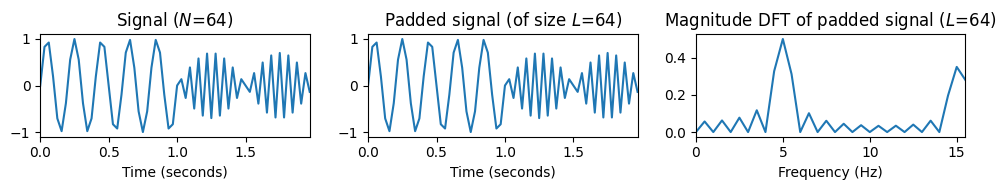

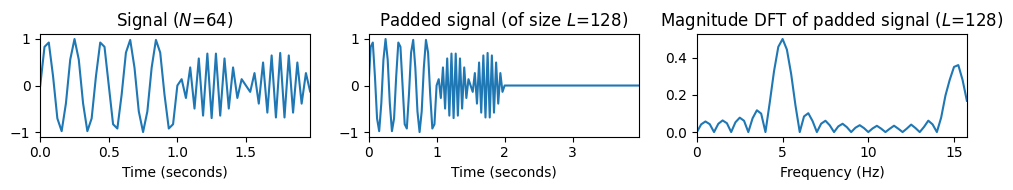

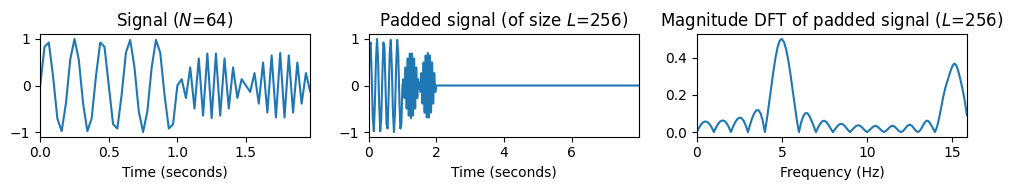

In [13]:
N = len(x)

L = N
ax1, ax2, ax3 = compute_plot_DFT_extended(t, x, Fs, L)

L = 2 * N
ax1, ax2, ax3 = compute_plot_DFT_extended(t, x, Fs, L)

L = 4 * N
ax1, ax2, ax3 = compute_plot_DFT_extended(t, x, Fs, L)

## 주파수 그리드 해상도가 증가된 STFT

- 이제 동일한 제로-패딩 전략을 사용하여 STFT의 주파수 그리드 해상도를 높이는 방법을 보자. `librosa` 함수 `librosa.stft`는 두 개의 파라미터 `n_fft`($L$에 해당) 및 `win_length`($N$에 해당)를 통해 이 아이디어를 구현한다. 파라미터를 물리적 도메인으로 변환할 때 주의해야 한다. 

- 바이올린(비브라토 포함)이 연주하는 음표 C4의 예를 보자

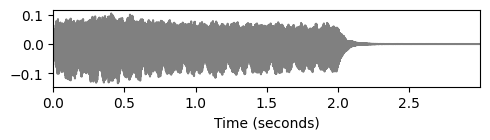

In [16]:
Fs = 11025
x, Fs = librosa.load("../audio/violin_c4.wav", sr=Fs)
ipd.display(ipd.Audio(x, rate=Fs))

t_wav = np.arange(0, x.shape[0]) * 1 / Fs
plt.figure(figsize=(5, 1.5))
plt.plot(t_wav, x, c='gray')
plt.xlim([t_wav[0], t_wav[-1]])
plt.xlabel('Time (seconds)')
plt.tight_layout()

- 이제 제로 패딩으로 STFT를 계산한다. 그림에서 축은 시간 프레임 및 주파수 빈으로 표시됩니다.

In [17]:
def compute_stft(x, Fs, N, H, L=N, pad_mode='constant', center=True):    
    X = librosa.stft(x, n_fft=L, hop_length=H, win_length=N, 
                     window='hann', pad_mode=pad_mode, center=center)
    Y = np.log(1 + 100 * np.abs(X) ** 2)
    F_coef = librosa.fft_frequencies(sr=Fs, n_fft=L)
    T_coef = librosa.frames_to_time(np.arange(X.shape[1]), sr=Fs, hop_length=H) 
    return Y, F_coef, T_coef

def plot_compute_spectrogram(x, Fs, N, H, L, color='gray_r'):
    Y, F_coef, T_coef = compute_stft(x, Fs, N, H, L)
    plt.imshow(Y, cmap=color, aspect='auto', origin='lower')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency (bins)')
    plt.title('L=%d' % L)
    plt.colorbar()

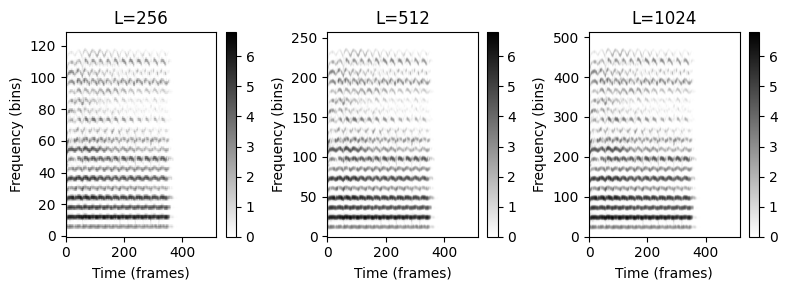

In [23]:
N = 256
H = 64
color = 'gray_r' 
plt.figure(figsize=(8, 3))

L = N
plt.subplot(1,3,1)
plot_compute_spectrogram(x, Fs, N, H, L)

L = 2 * N
plt.subplot(1,3,2)
plot_compute_spectrogram(x, Fs, N, H, L)

L = 4 * N
plt.subplot(1,3,3)
plot_compute_spectrogram(x, Fs, N, H, L)

plt.tight_layout()

- 다음으로 동일한 계산을 반복한다. 여기서 축은 이제 초와 헤르츠로 지정된 물리적 단위를 표시하도록 변환된다. 또한 시간-주파수 평면을 확대하여 밀도가 높은 주파수 그리드 밀도의 효과를 강조한다.

In [19]:
def plot_compute_spectrogram_physical(x, Fs, N, H, L, xlim, ylim, color='gray_r'):
    Y, F_coef, T_coef = compute_stft(x, Fs, N, H, L)
    extent=[T_coef[0], T_coef[-1], F_coef[0], F_coef[-1]]
    plt.imshow(Y, cmap=color, aspect='auto', origin='lower', extent=extent)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.title('L=%d' % L)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.colorbar()

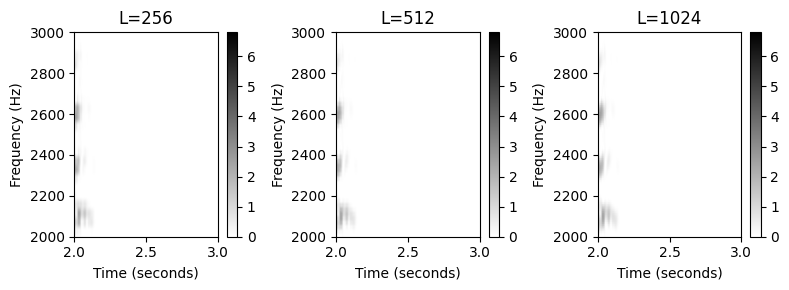

In [24]:
xlim_sec = [2, 3]
ylim_hz = [2000, 3000]

plt.figure(figsize=(8, 3))

L = N
plt.subplot(1,3,1)
plot_compute_spectrogram_physical(x, Fs, N, H, L, xlim=xlim_sec, ylim=ylim_hz)

L = 2 * N
plt.subplot(1,3,2)
plot_compute_spectrogram_physical(x, Fs, N, H, L, xlim=xlim_sec, ylim=ylim_hz)

L = 4 * N
plt.subplot(1,3,3)
plot_compute_spectrogram_physical(x, Fs, N, H, L, xlim=xlim_sec, ylim=ylim_hz)

plt.tight_layout()